<a href="https://colab.research.google.com/github/NikhithaVarma/NLP/blob/main/Sentiment_analysis_on_IMDB_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("IMDB Dataset.csv", on_bad_lines='skip')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(68358, 2)

In [6]:
#checking whether the data is balanced or not
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'}) 
vc_df

,Sentiment,Count
0,NaN,34191
1,NaN,34167


# **PreProcessing Data**

# Some common Problems:

1. Remove Punctuation
2. Replace short words
3. Making text lower case
4. Remove stopwords
5. Lemmatization

Removing punctuation (.!<>{}’,”(/)-)

In [12]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
68353    I thought this movie did a down right good job...
68354    Bad plot, bad dialogue, bad acting, idiotic di...
68355    I am a Catholic taught in parochial elementary...
68356    I'm going to have to disagree with the previou...
68357    No one expects the Star Trek movies to be high...
Name: review, Length: 68358, dtype: object

In [17]:
#replacing the symbols with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]", " ")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [18]:
# Re ordering columns
df = df[['review','review_processed','sentiment']]
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,A wonderful little production br br The...,positive
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,Basically there s a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Petter Mattei s Love in the Time of Money is...,positive
...,...,...,...
68353,I thought this movie did a down right good job...,I thought this movie did a down right good job...,positive
68354,"Bad plot, bad dialogue, bad acting, idiotic di...",Bad plot bad dialogue bad acting idiotic di...,negative
68355,I am a Catholic taught in parochial elementary...,I am a Catholic taught in parochial elementary...,negative
68356,I'm going to have to disagree with the previou...,I m going to have to disagree with the previou...,negative


In [19]:
df['review_processed']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production   br    br   The...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s  Love in the Time of Money  is...
                               ...                        
68353    I thought this movie did a down right good job...
68354    Bad plot  bad dialogue  bad acting  idiotic di...
68355    I am a Catholic taught in parochial elementary...
68356    I m going to have to disagree with the previou...
68357    No one expects the Star Trek movies to be high...
Name: review_processed, Length: 68358, dtype: object

Replacing short words

In [20]:
df['review_processed']=df['review_processed'].apply(lambda row:' '.join([word for word in row.split() if len(word)>2]))
df['review_processed']

0        One the other reviewers has mentioned that aft...
1        wonderful little production The filming techni...
2        thought this was wonderful way spend time too ...
3        Basically there family where little boy Jake t...
4        Petter Mattei Love the Time Money visually stu...
                               ...                        
68353    thought this movie did down right good job was...
68354    Bad plot bad dialogue bad acting idiotic direc...
68355    Catholic taught parochial elementary schools n...
68356    going have disagree with the previous comment ...
68357    one expects the Star Trek movies high art but ...
Name: review_processed, Length: 68358, dtype: object

 LowerCase character

In [21]:
#convert the entire text to lowercase
df['review_processed']=[review.lower() for review in df['review_processed']]
df['review_processed']

0        one the other reviewers has mentioned that aft...
1        wonderful little production the filming techni...
2        thought this was wonderful way spend time too ...
3        basically there family where little boy jake t...
4        petter mattei love the time money visually stu...
                               ...                        
68353    thought this movie did down right good job was...
68354    bad plot bad dialogue bad acting idiotic direc...
68355    catholic taught parochial elementary schools n...
68356    going have disagree with the previous comment ...
68357    one expects the star trek movies high art but ...
Name: review_processed, Length: 68358, dtype: object

Remove stop words

In [25]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words=stopwords.words('english')
# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','like','see','movies','get','makes','making','time','good','watch','character']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]
df['review_processed']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        reviewers mentioned watching episode hooked ri...
1        wonderful little production filming technique ...
2        thought wonderful way spend hot summer weekend...
3        basically family little boy jake thinks zombie...
4        petter mattei love money visually stunning mat...
                               ...                        
68353    thought right job creative original first expe...
68354    bad plot bad dialogue bad acting idiotic direc...
68355    catholic taught parochial elementary schools n...
68356    going disagree previous comment side maltin se...
68357    expects star trek high art fans expect best ep...
Name: review_processed, Length: 68358, dtype: object

Lemmatization

In [26]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [27]:
df['review_processed']

0        reviewer mention watch episode hook right exac...
1        wonderful little production film technique una...
2        think wonderful way spend hot summer weekend s...
3        basically family little boy jake think zombie ...
4        petter mattei love money visually stun mattei ...
                               ...                        
68353    think right job creative original first expect...
68354    bad plot bad dialogue bad act idiotic direct a...
68355    catholic teach parochial elementary school nun...
68356    go disagree previous comment side maltin secon...
68357    expect star trek high art fan expect best epis...
Name: review_processed, Length: 68358, dtype: object

Plotting Freqent Words

In [28]:
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,reviewer mention watch episode hook right exac...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production film technique una...,positive
2,I thought this was a wonderful way to spend ti...,think wonderful way spend hot summer weekend s...,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love money visually stun mattei ...,positive
...,...,...,...
68353,I thought this movie did a down right good job...,think right job creative original first expect...,positive
68354,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogue bad act idiotic direct a...,negative
68355,I am a Catholic taught in parochial elementary...,catholic teach parochial elementary school nun...,negative
68356,I'm going to have to disagree with the previou...,go disagree previous comment side maltin secon...,negative


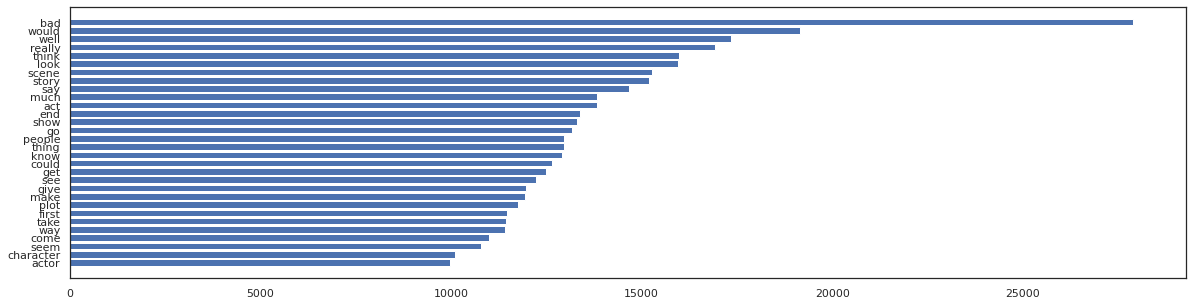

In [29]:
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

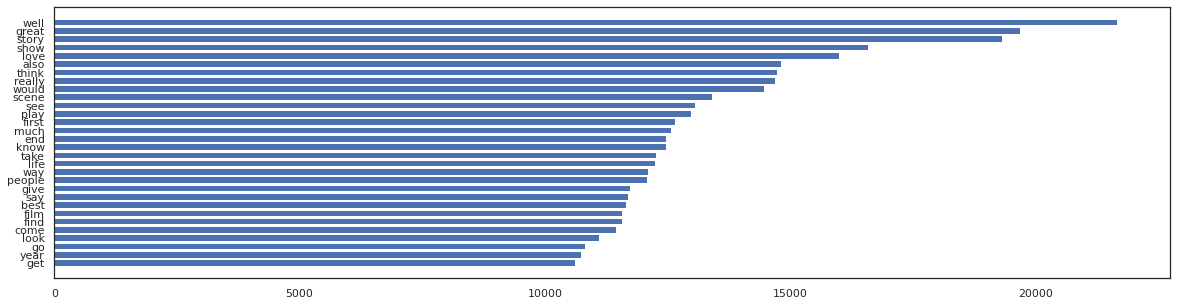

In [30]:
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

WordCloud

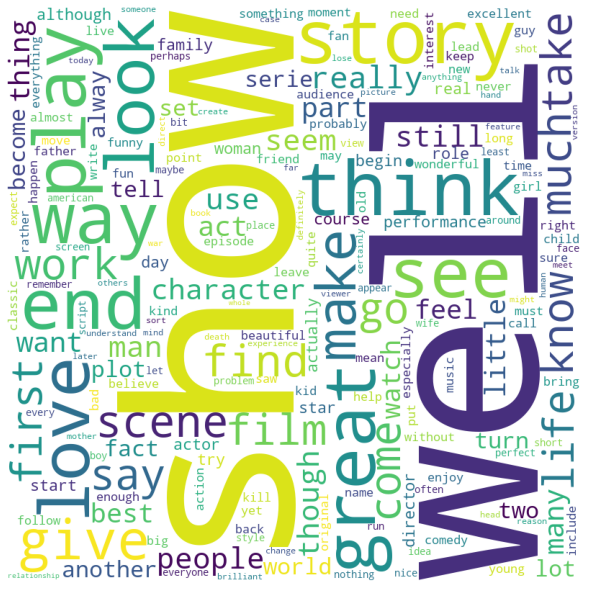

In [31]:
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'positive',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Bag of Words Model

In [32]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names()


X, y


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([1, 1, 1, ..., 0, 0, 0]))

In [33]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape

((54686, 2500), (13672, 2500))

# **Building the ML model**
# Feature Importance

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred
#featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)},columns = ['Word','Importance'])


array([1, 0, 0, ..., 0, 1, 0])

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[5694 1124]
 [1090 5764]]
The model accuracy is 0.83806319485079


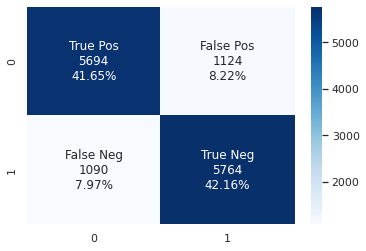

In [36]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.8380555239084169

In [38]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
112,0.133290,bad
1513,0.042786,waste
612,0.036407,great
107,0.021459,awful
478,0.015306,excellent
...,...,...
1048,0.000024,practice
1554,0.000024,wood
781,0.000018,lane
1221,0.000018,service
